In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from sklearn.naive_bayes import GaussianNB
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

## Cargando y explorando el conjunto de datos

In [64]:
iris = datasets.load_iris()
#Transformando a un dataframe de pandas
datos = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
#Cambiandole los nombres a las columnas
datos.columns=["Sepal.length","Sepal.width","Petal.length","Petal.width","Specie"]
datos

,Sepal.length,Sepal.width,Petal.length,Petal.width,Specie
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


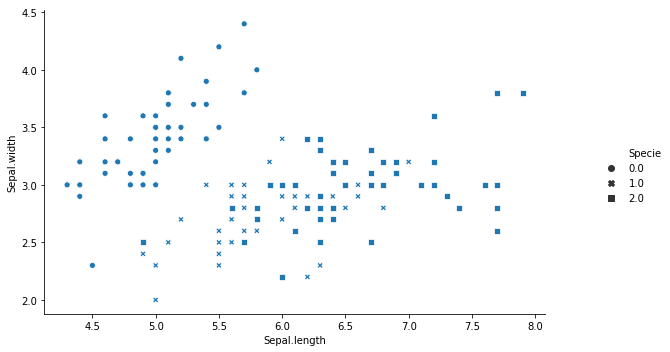

In [65]:
g=sns.relplot(x='Sepal.length',y='Sepal.width',data=datos,style='Specie')
g.fig.set_size_inches(10,5)
plt.show()

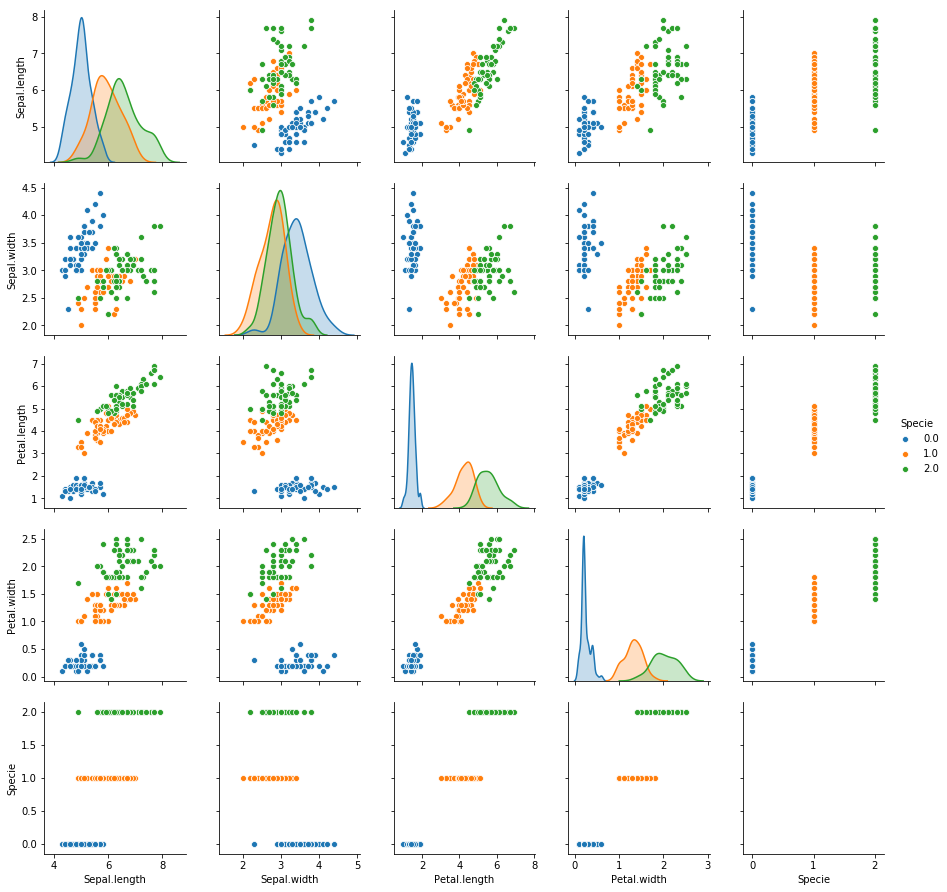

In [22]:
sns.pairplot(datos,hue="Specie")
plt.show()

In [66]:
Specie = datos.pop("Specie") 
datos.corr()

,Sepal.length,Sepal.width,Petal.length,Petal.width
Sepal.length,1.000000,-0.117570,0.871754,0.817941
Sepal.width,-0.117570,1.000000,-0.428440,-0.366126
Petal.length,0.871754,-0.428440,1.000000,0.962865
Petal.width,0.817941,-0.366126,0.962865,1.000000


Text(0.5, 1.0, 'Correlación de las variables numéricas de Iris')

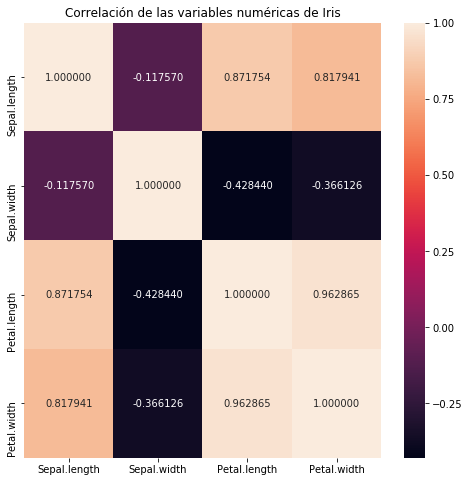

In [67]:
plt.subplots(figsize = (8,8))
sns.heatmap(datos.corr(),annot=True,fmt="f").set_title("Correlación de las variables numéricas de Iris")

### Separando en train y test

In [68]:
y = Specie #La variable respuesta
X = datos #El resto de los datos
random.seed(1234)

In [69]:

X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)

70% de entrenamiento y 30% prueba

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 122 to 113
Data columns (total 4 columns):
Sepal.length    105 non-null float64
Sepal.width     105 non-null float64
Petal.length    105 non-null float64
Petal.width     105 non-null float64
dtypes: float64(4)
memory usage: 4.1 KB


In [71]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 31 to 28
Data columns (total 4 columns):
Sepal.length    45 non-null float64
Sepal.width     45 non-null float64
Petal.length    45 non-null float64
Petal.width     45 non-null float64
dtypes: float64(4)
memory usage: 1.8 KB


## Creando el modelo

In [77]:
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
y_pred = gaussian.predict(X_test)
cm = confusion_matrix(y_test,y_pred)


In [79]:
accuracy=accuracy_score(y_test,y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('Accuracy: ',accuracy)

Confusion matrix for Naive Bayes
 [[11  0  0]
 [ 0 16  2]
 [ 0  0 16]]
Accuracy:  0.9555555555555556
